In [1]:
#imports

In [2]:
# General-purpose libraries
import pandas as pd
import re
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical analysis libraries
import statistics as stat
from scipy import stats

# Utilities for data processing and manipulation
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

# Importing WordCloud class for generating word clouds
from wordcloud import WordCloud 

In [3]:
# import CSV

In [4]:
df=pd.read_csv('medical_students_dataset.csv')

In [5]:
#Take a sample 

In [6]:
df=df.head(760)
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756.0,32.0,Male,164.216760,54.826371,A,NaN,98.116923,90.0,101.0,211.0,No,Yes
756,757.0,29.0,Female,190.511271,53.336245,NaN,14.695389,98.825971,90.0,105.0,167.0,No,No
757,758.0,28.0,Female,157.266133,54.588104,AB,22.071284,98.805496,94.0,130.0,230.0,No,No
758,759.0,23.0,Male,177.656771,84.426377,A,26.749436,98.557731,77.0,121.0,198.0,No,No


In [7]:
# Data Processing :

In [8]:
# Filling or removing missing values (NaN values)(Nuha)

In [9]:
#drop student id column which contain missing values and made new index
df = df.reset_index(drop=True)
df=df.drop(columns=["Student ID"])
df.index = pd.RangeIndex(start=0, stop=len(df), step=1)


#check about null values 
print(df.isnull().any())
print('\nNumber of null:',df.isnull().any().count())


#filling null value for numerical values using mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mean())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())


#removing missing string values that have unsignificant number comparing with data
df=df.dropna()
print('\n Data contain Null?\n',df.isnull().any())
print('Number of NAN:',df.isna().sum().sum())
df

Age               True
Gender            True
Height            True
Weight            True
Blood Type        True
BMI               True
Temperature       True
Heart Rate        True
Blood Pressure    True
Cholesterol       True
Diabetes          True
Smoking           True
dtype: bool

Number of null: 12

 Data contain Null?
 Age               False
Gender            False
Height            False
Weight            False
Blood Type        False
BMI               False
Temperature       False
Heart Rate        False
Blood Pressure    False
Cholesterol       False
Diabetes          False
Smoking           False
dtype: bool
Number of NAN: 0


,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,25.930576,Male,152.069157,47.630941,B,23.493277,98.714977,93.000000,104.000000,163.0,No,No
2,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.000000,130.000000,216.0,Yes,No
3,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.000000,112.000000,141.0,No,Yes
4,23.000000,Female,173.881460,46.234173,O,23.493277,98.480008,95.000000,114.805926,231.0,No,No
7,28.000000,Male,186.489402,52.389752,AB,15.063921,98.227788,85.000000,123.000000,128.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
754,25.000000,Male,160.124775,69.906854,B,26.371814,99.359963,89.000000,130.000000,144.0,No,Yes
755,32.000000,Male,164.216760,54.826371,A,23.493277,98.116923,90.000000,101.000000,211.0,No,Yes
757,28.000000,Female,157.266133,54.588104,AB,22.071284,98.805496,94.000000,130.000000,230.0,No,No
758,23.000000,Male,177.656771,84.426377,A,26.749436,98.557731,77.000000,121.000000,198.0,No,No


In [10]:
# Removing duplicate records(Rand)

In [11]:

#identify duplicated rows in df
duplicates = df[df.duplicated()]
#check if there are any duplicated rows
if duplicates.empty:
#if there are no duplicated rows
    print(df.duplicated())
    print("No duplicate found in the dataset")
else:
#if there are duplicated rows in df
    print(df.duplicated())
#remove the duplicated rows from the data
    df = df.drop_duplicates()
#update df with the rows after removing duplicates
    print("Duplicates removed successfully")
    print("the rows after removing duplicates:")
#display the rows after removing duplicates
    print(df)

1      False
2      False
3      False
4      False
7      False
       ...  
754    False
755    False
757    False
758    False
759    False
Length: 483, dtype: bool
No duplicate found in the dataset


In [12]:
# Reformatting data(Dana)

In [13]:
# Data before Reformatting
df.dtypes

Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [14]:
#Format columns into numbers after commas
    
df['Age']=df['Age'].astype(int)
df['Height']= df['Height'].apply(lambda x: float(f"{x:.2f}"))
df['Weight']= df['Weight'].apply(lambda x: float(f"{x:.2f}"))
df['BMI'] = df['BMI'].apply(lambda x: float(f"{x:.2f}"))
df['Temperature'] = df['Temperature'].apply(lambda x: float(f"{x:.2f}"))
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: float(f"{x:.2f}"))
df['Heart Rate'] = df['Heart Rate'].apply(lambda x: float(f"{x:.2f}"))


#Reformatting gender
def gen(val):
    if val =='Female'or val=='Femal':
        val='Female'
    elif val =='Male'or val=='male':
        val='Male'
    return val

df['Gender']=df['Gender'].apply(gen)

#reformat columns order
columns_order=['Gender','Age','Weight','Height','Blood Type','BMI','Temperature','Heart Rate','Blood Pressure','Cholesterol','Diabetes'
               ,'Smoking']
df=df[columns_order]


#format row names
df.index=[f'{i+1}'for i in range(483)]
df

,Gender,Age,Weight,Height,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,Male,25,47.63,152.07,B,23.49,98.71,93.00,104.00,163.0,No,No
2,Female,32,55.74,182.54,A,16.73,98.26,76.00,130.00,216.0,Yes,No
3,Male,30,63.33,182.11,B,19.10,98.84,99.00,112.00,141.0,No,Yes
4,Female,23,46.23,173.88,O,23.49,98.48,95.00,114.81,231.0,No,No
5,Male,28,52.39,186.49,AB,15.06,98.23,85.00,123.00,128.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
479,Male,25,69.91,160.12,B,26.37,99.36,89.00,130.00,144.0,No,Yes
480,Male,32,54.83,164.22,A,23.49,98.12,90.00,101.00,211.0,No,Yes
481,Female,28,54.59,157.27,AB,22.07,98.81,94.00,130.00,230.0,No,No
482,Male,23,84.43,177.66,A,26.75,98.56,77.00,121.00,198.0,No,No


In [15]:
# the result after Reformatting
df.dtypes

Gender             object
Age                 int64
Weight            float64
Height            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [16]:
# Validating data (Aliaa)

In [17]:
#Validate Gender

# Check if Gender matches valid options ('Female' or 'Male')
def Match_Gender(val): 
    if re.fullmatch(val,'Female') or re.fullmatch(val,'Male'):
        return 'Match'
    else :
        return 'No Match'
print('MATCHES ?\n')
print(df['Gender'].apply(Match_Gender))

#Validate Diabetes

# Replace incorrect entries with validated ones

df['Diabetes']=df['Diabetes'].str.replace('yes','Yes')
df['Diabetes']=df['Diabetes'].str.replace('no','No')

# Check if Diabetes matches valid options ('Yes' or 'No')
def Match_Diabetes(val): 
    if re.fullmatch(val,'Yes') or re.fullmatch(val,'No'):
        return 'Match'
    else :
        return 'No Match'
    
print(df['Diabetes'].apply(Match_Diabetes))

#Validate Smoking

# Replace incorrect entries with validated ones
df['Smoking']=df['Smoking'].str.replace('yes','Yes')
df['Smoking']=df['Smoking'].str.replace('no','No')

# Check if Diabetes matches valid options ('Yes' or 'No')
def Match_Smoking(val): 
    if re.fullmatch(val,'Yes') or re.fullmatch(val,'No'):
        return 'Match'
    else :
        return 'No Match'
print(df['Smoking'].apply(Match_Smoking))


#Validate Age : Ensure Age is within valid bounds (18 to 90)
def Age_Validate(val):
    if val<18:
        return 18
    elif val>90 :
        return 90
    return val

df['Age']=df['Age'].apply(Age_Validate)

#Validate Blood Type : Standardize blood types 

def BloodType_Validate(val):
    if val =='O'or val=='o':
        val='O'
    if val =='ab'or val=='AB':
        val='AB'
    if val =='A'or val=='a':
        val='A'
    if val =='B'or val=='b':
        val='B'
    return val

df['Blood Type']=df['Blood Type'].apply(BloodType_Validate)

# Check if matches uppercase letters
print(df['Blood Type'].str.match(r'[A-Z]'))

#Validate Height : Ensure height is within valid bounds (150 to 210)
def Height_Validate(val):
    if val<150:
        return 150
    elif val>210 :
        return 210
    return val

df['Height']=df['Height'].apply(Height_Validate)

# Check if height contains digits
print(df['Height'].astype(str).str.match(r'\d'))

#Validate Weight : Ensure weight is within valid bounds (40 to 110)

def Weight_Validate(val):
    if val<40:
        return 40
    elif val>110 :
        return 110
    return val
df['Weight']=df['Weight'].apply(Weight_Validate)

# Check if weight contains digits
print(df['Weight'].astype(str).str.match(r'\d'))

#Validate Blood Pressure : Ensure Blood Pressure are within valid bounds (90 to 180)

def BloodP_Validate(val):
    if val<90:
        return 90
    elif val>180 :
        return 180
    return val

df['Blood Pressure']=df['Blood Pressure'].apply(BloodP_Validate)

# Check if Blood Pressure contains digits
print(df['Blood Pressure'].astype(str).str.match(r'\d'))

# Validate Cholesterol : Ensure Cholesterol are within valid bounds (120 to 260) 
def Cholesterol_Validate(val):
    if val<120:
        return 120
    elif val>260 :
        return 260
    return val

df['Cholesterol']=df['Cholesterol'].apply(Cholesterol_Validate)

# Check if Cholesterol contains digits
print(df['Cholesterol'].astype(str).str.match(r'\d'))

#Validate Heart Rate : Ensure Heart Rate are within valid bounds (60 to 100)
def HeartRate_Validate(val):
    if val<60:
        return val
    elif val>100 :
        return 100
    return val

df['Heart Rate']=df['Heart Rate'].apply(HeartRate_Validate)

# Check if Heart Rate contains digits
df['Heart Rate'].astype(str).str.match(r'\d')

#Validate Temperature : Ensure Temperature are within valid bounds (95 to 110)
def Temperature_Validate(val):
    if val<95:
        return 95
    elif val>110 :
        return 110
    return val

df['Temperature']=df['Temperature'].apply(Temperature_Validate)

# Check if Temperature contains digits
print(df['Temperature'].astype(str).str.match(r'\d'))

#Validate BMI : Ensure BMI are within valid bounds (10 to 45)

def BMI_Validate(val):
    if val<10:
        return 10
    elif val>45 :
        return 45
    return val
df['BMI']=df['BMI'].apply(BMI_Validate)

# Check if BMI contains digits
print(df['BMI'].astype(str).str.match(r'\d'))


MATCHES ?

1      Match
2      Match
3      Match
4      Match
5      Match
       ...  
479    Match
480    Match
481    Match
482    Match
483    Match
Name: Gender, Length: 483, dtype: object
1      Match
2      Match
3      Match
4      Match
5      Match
       ...  
479    Match
480    Match
481    Match
482    Match
483    Match
Name: Diabetes, Length: 483, dtype: object
1      Match
2      Match
3      Match
4      Match
5      Match
       ...  
479    Match
480    Match
481    Match
482    Match
483    Match
Name: Smoking, Length: 483, dtype: object
1      True
2      True
3      True
4      True
5      True
       ... 
479    True
480    True
481    True
482    True
483    True
Name: Blood Type, Length: 483, dtype: bool
1      True
2      True
3      True
4      True
5      True
       ... 
479    True
480    True
481    True
482    True
483    True
Name: Height, Length: 483, dtype: bool
1      True
2      True
3      True
4      True
5      True
       ... 
479    True
480 

In [18]:
# Tokenizing text data(Dana)

In [19]:

# Define a function to categorize cholesterol levels
def Cholesterol_categories(value):
    if value < 200:
        return 'Normal'
    elif 200 <= value < 239:
        return 'High'
    elif value >=240 :
        return 'Very High'

# Apply the function to the 'Cholesterol' column
df['Cholesterol'] = df['Cholesterol'].apply(Cholesterol_categories)


In [20]:
df

,Gender,Age,Weight,Height,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,Male,25,47.63,152.07,B,23.49,98.71,93.00,104.00,Normal,No,No
2,Female,32,55.74,182.54,A,16.73,98.26,76.00,130.00,High,Yes,No
3,Male,30,63.33,182.11,B,19.10,98.84,99.00,112.00,Normal,No,Yes
4,Female,23,46.23,173.88,O,23.49,98.48,95.00,114.81,High,No,No
5,Male,28,52.39,186.49,AB,15.06,98.23,85.00,123.00,Normal,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
479,Male,25,69.91,160.12,B,26.37,99.36,89.00,130.00,Normal,No,Yes
480,Male,32,54.83,164.22,A,23.49,98.12,90.00,101.00,High,No,Yes
481,Female,28,54.59,157.27,AB,22.07,98.81,94.00,130.00,High,No,No
482,Male,23,84.43,177.66,A,26.75,98.56,77.00,121.00,Normal,No,No


In [21]:
# Normalizing data (Rana)

In [22]:
#X2  copy is made of the data in columns 0 to 12 (from the first to the thirteenth column)
X2=df.iloc[:, 0:13]
#X2 Contains only specific columns, which are later used to normalize the data (reduce values to a specific range).
X2=pd.DataFrame(X2, columns= ['Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate','Blood Pressure'])

#Apply Normalization Functions
minMaxscaler = MinMaxScaler(feature_range=(0,1))
X2 = minMaxscaler.fit_transform(X2)
X2=pd.DataFrame(X2, columns=['Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure'])
X2

,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure
0,0.040256,0.124874,0.434555,0.460526,0.846154,0.285714
1,0.650511,0.260811,0.213351,0.312500,0.410256,0.816327
2,0.641899,0.388032,0.290903,0.503289,1.000000,0.448980
3,0.477068,0.101408,0.434555,0.384868,0.897436,0.506327
4,0.729621,0.204660,0.158704,0.302632,0.641026,0.673469
...,...,...,...,...,...,...
478,0.201482,0.498324,0.528796,0.674342,0.743590,0.816327
479,0.283597,0.245558,0.434555,0.266447,0.769231,0.224490
480,0.144402,0.241535,0.388089,0.493421,0.871795,0.816327
481,0.552774,0.741703,0.541230,0.411184,0.435897,0.632653


In [23]:
#Data Analysis

In [24]:
#Finding central values (mean, median, mode)(Nuha)

In [25]:
#mean,mode,median for numaric value
mean_values={'Age':df['Age'].mean(),'Height':df['Height'].mean(),'Weight':df['Weight'].mean()
            ,'BMI':df['BMI'].mean(),'Temperature':df['Temperature'].mean(),'Heart Rate':df['Heart Rate'].mean()
            ,'Blood Pressure':df['Blood Pressure'].mean()}
#make dataframe fo mean values
mean_df = pd.DataFrame(list(mean_values.items()), columns=['Metric', 'Mean Value'])
print(mean_df)

#median
median_values={'Age':df['Age'].median(),'Height':df['Height'].median(),'Weight':df['Weight'].median()
            ,'BMI':df['BMI'].median(),'Temperature':df['Temperature'].median(),'Heart Rate':df['Heart Rate'].median()
            ,'Blood Pressure':df['Blood Pressure'].median()}

#make dataframe fo meadian values
median_df = pd.DataFrame(list(median_values.items()), columns=['Metric', 'Median Value'])
print(median_df)

#mode
#finding mode , and converting to list to make sure all values stored, and dont be as Series

mode_values={'Age':df['Age'].mode().tolist(),'Height':df['Height'].mode().tolist(),'Weight':df['Weight'].mode().tolist()
            ,'BMI':df['BMI'].mode().tolist(),'Temperature':df['Temperature'].mode().tolist(),'Heart Rate':df['Heart Rate'].mode().tolist()
            ,'Blood Pressure':df['Blood Pressure'].mode().tolist()}

#make dataframe fo mode values
mode_df = pd.DataFrame(list(mode_values.items()), columns=['Metric', 'Mode Value'])
print(mode_df)

           Metric  Mean Value
0             Age   25.879917
1          Height  174.026501
2          Weight   69.650062
3             BMI   23.522133
4     Temperature   98.637039
5      Heart Rate   78.404265
6  Blood Pressure  114.665342
           Metric  Median Value
0             Age         25.00
1          Height        173.88
2          Weight         69.91
3             BMI         23.49
4     Temperature         98.64
5      Heart Rate         78.86
6  Blood Pressure        114.81
           Metric Mode Value
0             Age       [25]
1          Height   [173.88]
2          Weight    [69.91]
3             BMI    [23.49]
4     Temperature    [98.64]
5      Heart Rate    [78.86]
6  Blood Pressure   [114.81]


In [26]:
# Calculating the correlation between variables (Rana)

In [27]:
#X1 A copy is made of the data in columns 0 to 12 (from the first to the thirteenth column)
X1=df.iloc[:, 0:13]
#x1 contains a dataframe for all numerical values for Correlation use.
X1=pd.DataFrame(X1, columns= ['Age','Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate','Blood Pressure'])
#Correlation account
correlation = X1.corr()

In [28]:
# Finding common words in text data (e.g., word frequency analysis) (Rand)

In [29]:
# Select 483 rows from the 'Gender' column and the 'Blood Type' column and store them in 'text_Gender','text_Blood'
text_Gender = df[['Gender']].iloc[:483]
text_Blood = df[['Blood Type']].iloc[:483]

# Create a list 'all_gender' to store all gender values from the 'Gender' column
all_gender = []
for gender in text_Gender['Gender']:
    all_gender.append(gender)

# Create a list 'all_blood' to store all blood type values from the 'Blood Type' column
all_blood = []   
for blood in text_Blood['Blood Type']:
    all_blood.append(blood)  

# Count the frequency of each gender value in 'all_gender' list
word_counts_gender = Counter(all_gender)
# Count the frequency of each blood type value in 'all_blood' list
word_counts_blood = Counter(all_blood)

print("Gender Counts: ", word_counts_gender)
print("Blood Type Counts: ", word_counts_blood)

Gender Counts:  Counter({'Male': 245, 'Female': 238})
Blood Type Counts:  Counter({'A': 134, 'AB': 125, 'B': 121, 'O': 103})


In [30]:
#Grouping and aggregating data (Aliaa)

In [31]:
#Group by and aggregating Gender and calculate statistics for Height
print("\n-------- Statistics for Height by Gender --------")
Height_by_Gender=df.groupby('Gender')['Height'].agg(Minimum='min',Median='median',Maximum='max',Mean='mean')
print(Height_by_Gender)

# Group by and aggregating Diabetes and calculate statistics for Temperature
print("\n----Statistics for Temperature by Diabetes Status ----")

Temperature_by_Diabetes=df.groupby('Diabetes')['Temperature'].agg(Minimum='min',Median='median',Maximum='max',Mean='mean')
print(Temperature_by_Diabetes)


# Group by Diabetes and calculate the average Blood Pressure
print('------------------------------------------------')
Diabetes_Average_BloodPressure=df.groupby('Diabetes')['Blood Pressure'].mean().to_frame('Avreage Blood Pressure').sort_values('Avreage Blood Pressure',ascending=False)
print(Diabetes_Average_BloodPressure)

# Group by Gender and Blood Type, and count occurrences of Age
print('------------------------------------------------')
Gen_BloodT_count = df.groupby(['Gender', 'Blood Type']).size().to_frame('Count of gender by Blood Type')
print(Gen_BloodT_count)

# Group by Smoking and provide descriptive statistics for BMI
print("\n-----Descriptive Statistics for BMI by Smoking Status -----")

Smooking_Bmi=df.groupby('Smoking')['BMI'].describe()
print(Smooking_Bmi)

# Group by Diabetes and calculate the mean of Blood Pressure and BMI

df.groupby('Diabetes')[['Blood Pressure','BMI']].mean()



-------- Statistics for Height by Gender --------
        Minimum  Median  Maximum        Mean
Gender                                      
Female   150.06  173.88   199.87  173.076891
Male     150.39  173.88   199.99  174.948980

----Statistics for Temperature by Diabetes Status ----
          Minimum  Median  Maximum       Mean
Diabetes                                     
No          97.31   98.64   100.35  98.647614
Yes         97.56   98.57    99.42  98.528837
------------------------------------------------
          Avreage Blood Pressure
Diabetes                        
Yes                   117.136279
No                    114.423864
------------------------------------------------
                   Count of gender by Blood Type
Gender Blood Type                               
Female A                                      60
       AB                                     63
       B                                      64
       O                                      51
Male 

,Blood Pressure,BMI
Diabetes,,
No,114.423864,23.333295
Yes,117.136279,25.454419


In [32]:
# Data Visualization 

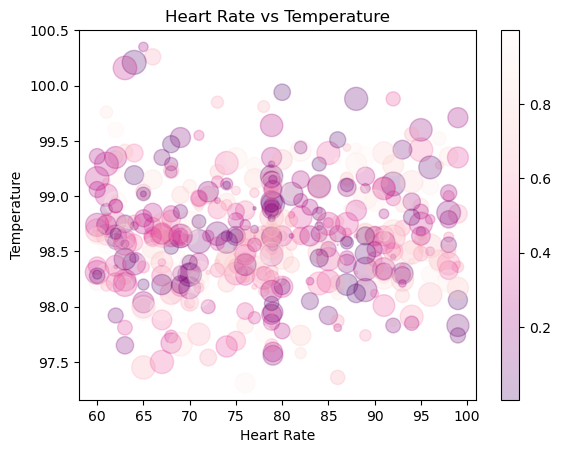

In [33]:
# Data Visualization : Scatter Plots (Aliaa)
# Set a random seed for reproducibility 
rng=np.random.RandomState(0)
# Set X for Heart Rate and y Temperature
x=df['Heart Rate']
y=df['Temperature']
colors = rng.rand(len(x))
sizes = 300 * rng.rand(len(x))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.25, cmap='RdPu_r')

# Set a lable for x and y 
plt.xlabel('Heart Rate')
plt.ylabel('Temperature')

# Set a title for the plot
plt.title('Heart Rate vs Temperature')

# Add a color bar
plt.colorbar()  
plt.show()

{25: 75, 32: 25, 30: 14, 23: 18, 28: 25, 21: 30, 34: 35, 31: 20, 22: 28, 29: 36, 18: 29, 27: 27, 24: 21, 33: 28, 20: 25, 26: 17, 19: 30}
max 34 min 18


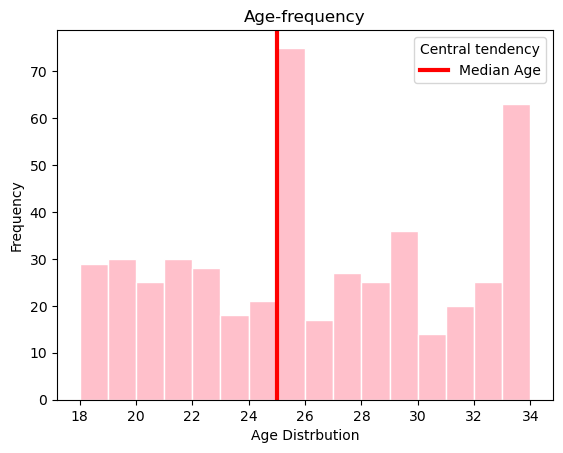

In [34]:
# Data Visualization : Histogram (Nuha)
#make dictionary to count frequency of the ages
x=list(df['Age'])
dic={}
for y in x:
    if y not in dic:
        dic[y]=0
    dic[y]+=1
print(dic)

#Knowing max and min to make good x-axis range in the graph
print('max',max(dic),'min',min(dic))


#make the numbers of bins equally to the raneg of ages, which make my work more precise.
bin=[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]

#hist method for making histogram
plt.hist(df['Age'],bins=bin,edgecolor='white',color='pink')

#using meadian values for Ages and diagram it as vertical line
Age_median=median_values['Age']
plt.axvline(Age_median,color='red',label='Median Age',linewidth=3)

#naming x,y labels, legend, and the title 
plt.xlabel("Age Distrbution")
plt.ylabel("Frequency")
plt.title("Age-frequency")
plt.legend(title="Central tendency")
plt.show()

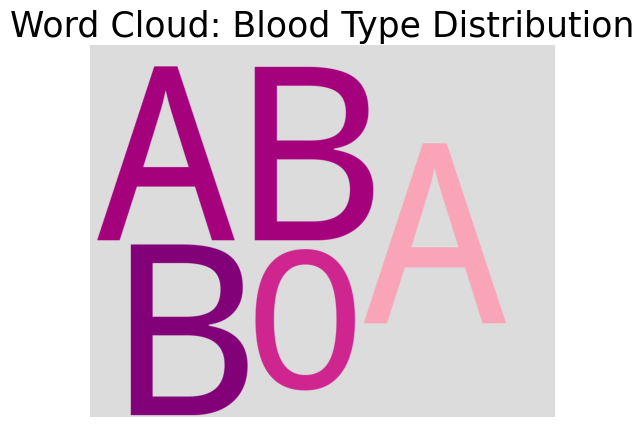

In [35]:
# Data Visualization : word cloud (Rand)
# Generate a word cloud using the frequencies from 'word_counts_blood' with specified width, height, and background color
wordcloud = WordCloud(width=1000, height=800,background_color='Gainsboro',colormap='RdPu_r', random_state=12
).generate_from_frequencies(word_counts_blood) 

# Set up the figure size for the plot 
plt.figure(figsize=(6, 6))
# Display the generated word cloud image
plt.imshow(wordcloud)
plt.axis('off')  
plt.title('Word Cloud: Blood Type Distribution', fontsize=25, color='black')
plt.show()


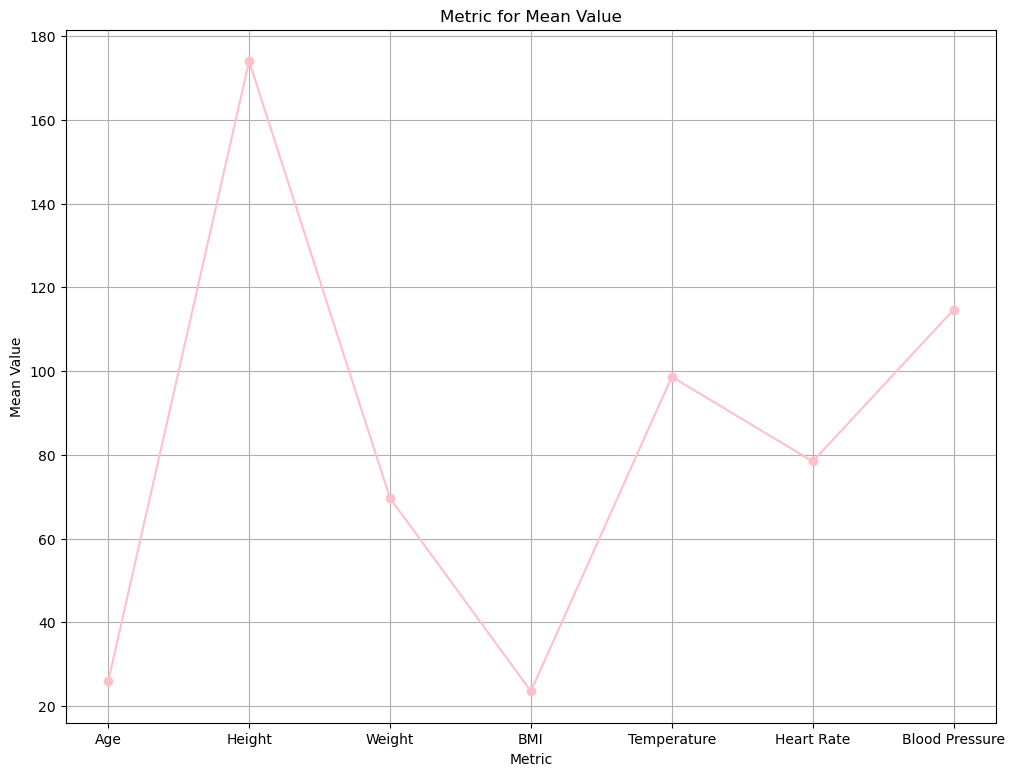

In [36]:
# Data Visualization : Line graph (Rana)
#line graphs Metric for Mean Value
plt.figure(figsize=(12, 9))
plt.plot(mean_df['Metric'],mean_df['Mean Value'],marker='o',color='pink')
plt.title('Metric for Mean Value')
plt.xlabel('Metric')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()


<Axes: >

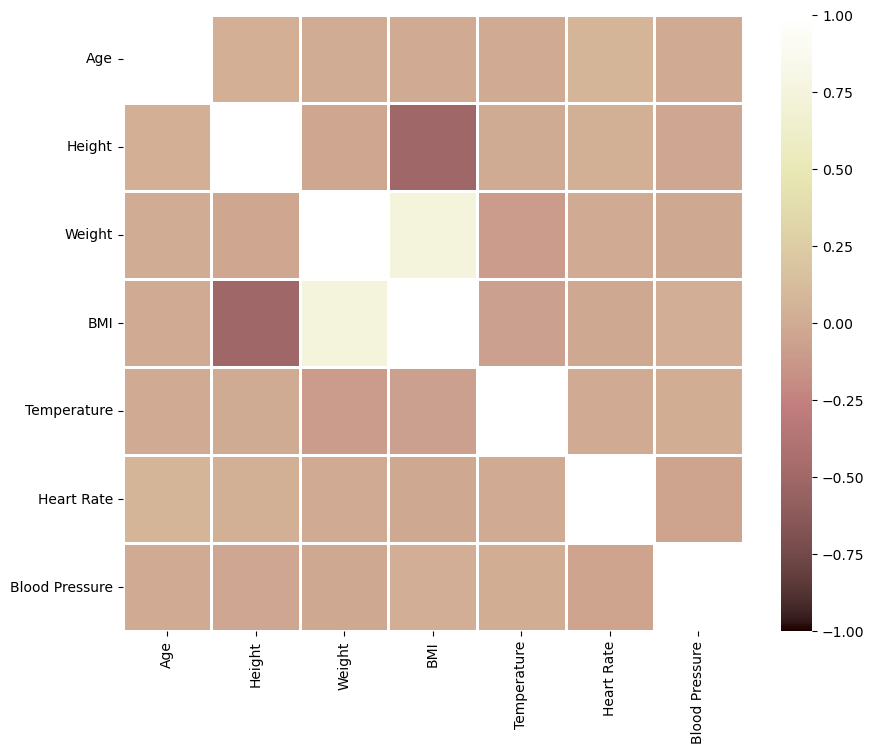

In [37]:
# Data Visualization : heatmaps for corellarion (Rana)
# Heatmaps to show correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='pink', vmin=-1, vmax=1, linewidth=1)


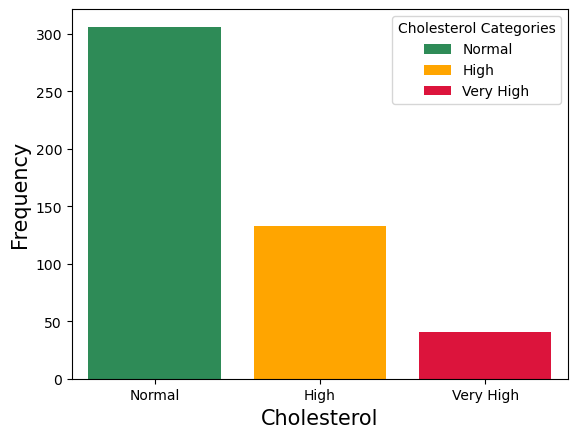

In [40]:
#Count the number of frequency for cholesterol categories
frequency=df['Cholesterol'].value_counts()
#Data visualization Bar Charts between("Cholesterol,"Frequency)

frequency.plot(kind='bar',label='Normal',color='seagreen')
frequency.plot(kind='bar',label='High',color='Orange')
frequency.plot(kind='bar',label='Very High',color='crimson')

# Recreated the bar chart to display a legend on the side of the chart explaining what each color represents
plt.bar(frequency.index,frequency.values,color=['seagreen','orange','crimson'])

plt.xticks(rotation=0)
plt.xlabel("Cholesterol",fontsize=15) 
plt.ylabel("Frequency",fontsize=15)  
plt.legend(title='Cholesterol Categories')



plt.show()